
## Открытый курс по машинному обучению
Автор материала: Екатерина Демидова, Data Scientist @ Segmento

Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.


# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы нам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [2]:
df = pd.read_csv('../input/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/post/250602/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['day'] = [d.day for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [11]:
df.groupby(['year', 'month'])[['title']].count().sort_values('title', ascending=False).head()

title
year month       
2015 3       2189
2016 3       2115
2015 7       2111
     4       2110
     12      2084

So, it's March, 2015.

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

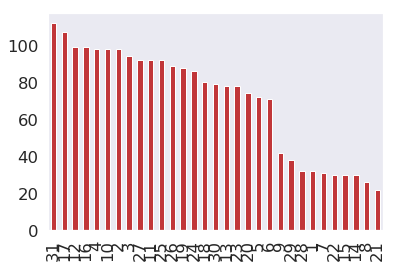

In [12]:
df1 = df[ (df['month']==3) & (df['year']==2015)]
df1['day'].value_counts().plot(kind='bar');

Нет, никакой день особо не выделяется.

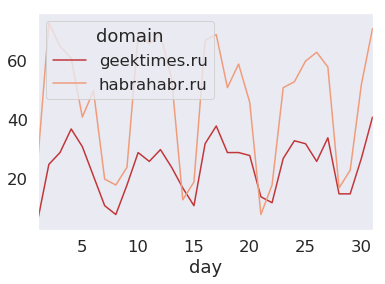

In [13]:
df1.pivot_table(index='day', values='title', aggfunc='count', columns='domain').plot();

Нет, на Хабре НЕ всегда больше статей.

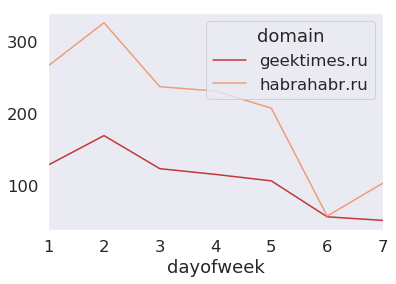

In [14]:
df1.pivot_table(index='dayofweek', values='title', aggfunc='count', columns='domain').plot();

Да, По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

Нужно посмотреть на количество просмотров по часам, количество комментариев по часам и число комментариев по часам отдельно для гиктаймса и хабра.

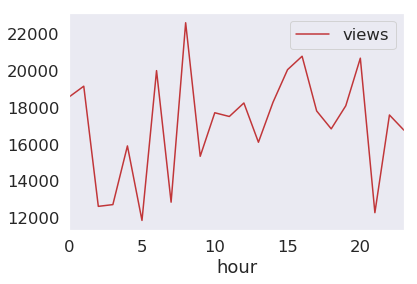

In [15]:
#просмотров по часам
df1.pivot_table(index='hour', values='views', aggfunc='mean').plot();

Пик просмотров не совсем на 12 часах дня. Статьи, опубликованные в 6 утра, не набирают больше всего просмотров.

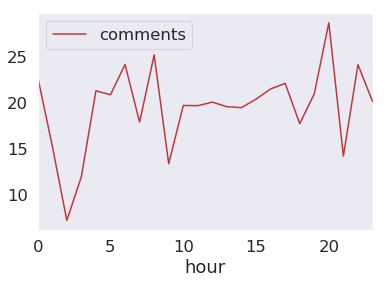

In [16]:
# комментарии по часам
df1.pivot_table(index='hour', values='comments', aggfunc='mean').plot();

Нет, у опубликованных в 10 в среднем не больше всего комментариев.

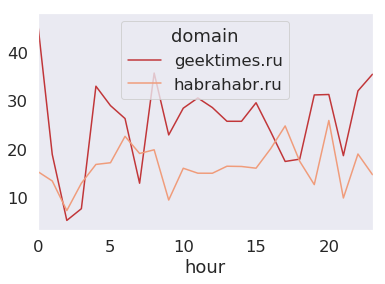

In [17]:
# комментарии по часам и доменам
df1.pivot_table(index='hour', values='comments', aggfunc='mean', columns='domain').plot();

Максимальное среднее число комментариев на гиктаймсе набрала не статья, опубликованная в 9 часов вечера.
На Хабре дневные статьи комментируют в среднем чаще, чем вечерние, но незначительно.

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [18]:
df_top20 = df.sort_values(by='')

KeyError: ''

In [19]:
df.pivot_table(index='author', values='votes_minus', aggfunc='count').sort_values(by='votes_minus', ascending=False).head(20)

,votes_minus
author,
@alizar,5264
@marks,4709
@SLY_G,1939
@ivansychev,1350
@semen_grinshtein,1171
@jeston,1059
@aleksandrit,631
@XaocCPS,596
@Mithgol,555


Посчитала сумму, хотя разумнее считаю смотреть на среднее. Ответ: @alizar. Если смотреть на среднее количество минусов за публикацию вместо суммарного, то ни одного из заявленных кандидатов в топ-20 нет.

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

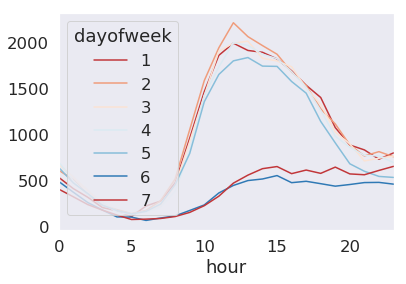

In [20]:
df.pivot_table(index='hour', values='title', aggfunc='count', columns='dayofweek').plot();

Да, по субботам больше пишут днем. И по понедельникам тоже днем.